In [1]:
import pandas as pd

input = pd.read_csv("input.csv")
input.head()

,duration,dtstart,dtend,location,author,type,title
0,4.0,2022-05-18T02:00:00Z,2022-05-18T02:04:00Z,"MSR Main room - even hours - , ,","Nhan Nguyen, Sarah Nadi",MSR Technical Papers,An Empirical Evaluation of GitHub Copilot’s C...
1,4.0,2022-05-18T02:04:00Z,2022-05-18T02:08:00Z,"MSR Main room - even hours - , ,","Nikitha Rao, Jason Tsay, Martin Hirzel, Vince...",MSR Technical Papers,Comments on Comments: Where Code Review and D...
2,7.0,2022-05-18T02:08:00Z,2022-05-18T02:15:00Z,"MSR Main room - even hours - , ,","Akalanka Galappaththi, Sarah Nadi, Christoph ...",MSR Technical Papers,Does This Apply to Me? An Empirical Study of ...
3,7.0,2022-05-18T02:15:00Z,2022-05-18T02:22:00Z,"MSR Main room - even hours - , ,","Jirat Pasuksmit, Patanamon Thongtanunam, Shan...",MSR Technical Papers,Towards Reliable Agile Iterative Planning via...
4,7.0,2022-05-18T02:22:00Z,2022-05-18T02:29:00Z,"MSR Main room - even hours - , ,","Ahmad Abdellatif, Mairieli Wessel, Igor Stein...",MSR Technical Papers,BotHunter: An Approach to Detect Software Bot...


In [2]:
input['id'] = range(1, len(input)+1)
for i in range(len(input)):
    # check if author is a string
    if type(input['author'][i]) != str:
        input['author'][i] = []
    else:
        input['author'][i] = input['author'][i].split(',')
input.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_30852\338955969.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['author'][i] = input['author'][i].split(',')
C:\Users\hp\AppData\Local\Temp\ipykernel_30852\338955969.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['author'][i] = []


,duration,dtstart,dtend,location,author,type,title,id
0,4.0,2022-05-18T02:00:00Z,2022-05-18T02:04:00Z,"MSR Main room - even hours - , ,","[ Nhan Nguyen, Sarah Nadi]",MSR Technical Papers,An Empirical Evaluation of GitHub Copilot’s C...,1
1,4.0,2022-05-18T02:04:00Z,2022-05-18T02:08:00Z,"MSR Main room - even hours - , ,","[ Nikitha Rao, Jason Tsay, Martin Hirzel, V...",MSR Technical Papers,Comments on Comments: Where Code Review and D...,2
2,7.0,2022-05-18T02:08:00Z,2022-05-18T02:15:00Z,"MSR Main room - even hours - , ,","[ Akalanka Galappaththi, Sarah Nadi, Christo...",MSR Technical Papers,Does This Apply to Me? An Empirical Study of ...,3
3,7.0,2022-05-18T02:15:00Z,2022-05-18T02:22:00Z,"MSR Main room - even hours - , ,","[ Jirat Pasuksmit, Patanamon Thongtanunam, S...",MSR Technical Papers,Towards Reliable Agile Iterative Planning via...,4
4,7.0,2022-05-18T02:22:00Z,2022-05-18T02:29:00Z,"MSR Main room - even hours - , ,","[ Ahmad Abdellatif, Mairieli Wessel, Igor St...",MSR Technical Papers,BotHunter: An Approach to Detect Software Bot...,5


In [3]:
import GA
import random

population_size = 50
max_generations = 100
crossover_probability = 0.8
mutation_probability = 0.2
num_sessions = 28


# create papers
papers = []
for i in range(len(input)):
    paper = GA.Paper(id=input['id'][i], authors=input['author'][i], duration=input['duration'][i])
    papers.append(paper)

session_lengths = [50]*num_sessions
num_tracks_per_session = [random.randint(1, 2) for _ in range(num_sessions)]

session_details = [(
    session_lengths[i],
    num_tracks_per_session[i]
) for i in range(len(session_lengths))]

# Create an instance of the GA class
ga = GA.GeneticAlgorithm(population_size, max_generations, crossover_probability, mutation_probability)

# Create the initial population
initial_population = ga.create_population(papers, session_details, population_size)
pop = GA.Population(initial_population, population_size)

pop.print_population()


Solution 1:
Session 1 (Max length: 50 minutes):
  Track 1 (Total duration: 47.0 minutes):
    Paper ID: 39, Authors:  Davide Rossi,  Stefano Zacchiroli, Duration: 4.0 minutes
    Paper ID: 127, Authors:  Saurabh Pujar,  Yunhui Zheng,  Luca Buratti,  Burn Lewis,  Alessandro Morari,  Jim A. Laredo,  Kevin Postlethwait,  Christoph Görn, Duration: 7.0 minutes
    Paper ID: 95, Authors:  Ekaterina Koshchenko,  Egor Klimov,  Vladimir Kovalenko, Duration: 7.0 minutes
    Paper ID: 107, Authors:  Audris Mockus, Duration: 10.0 minutes
    Paper ID: 134, Authors:  Bruno L. Sousa,  Mariza Bigonha,  Kecia A. M. Ferreira,  Glaura C. Franco, Duration: 4.0 minutes
    Paper ID: 40, Authors:  Johannes Härtel,  Ralf Laemmel, Duration: 7.0 minutes
    Paper ID: 185, Authors:  Eman Abdullah AlOmar,  Anthony Peruma,  Mohamed Wiem Mkaouer,  Christian D. Newman,  Ali Ouni, Duration: 8.0 minutes
----------------------------------------
Session 2 (Max length: 50 minutes):
  Track 1 (Total duration: 47.0 minut

In [4]:
# calculate fitness of the initial population and print the best solution
best = pop.best_solution(len(papers))
best[0].print_solution()

Session 1 (Max length: 50 minutes):
  Track 1 (Total duration: 48.0 minutes):
    Paper ID: 155, Authors:  Kristiina Rahkema,  Dietmar Pfahl, Duration: 8.0 minutes
    Paper ID: 26, Authors:  Shaiful Chowdhury,  Gias Uddin,  Reid Holmes, Duration: 7.0 minutes
    Paper ID: 65, Authors:  Cedric Richter,  Heike Wehrheim, Duration: 4.0 minutes
    Paper ID: 118, Authors:  Fiorella Zampetti,  Vittoria Nardone,  Massimiliano Di Penta, Duration: 7.0 minutes
    Paper ID: 107, Authors:  Audris Mockus, Duration: 10.0 minutes
    Paper ID: 136, Authors: Subaihin,  Rebecca Moussa,  Federica Sarro, Duration: 4.0 minutes
    Paper ID: 39, Authors:  Davide Rossi,  Stefano Zacchiroli, Duration: 4.0 minutes
    Paper ID: 75, Authors: Baptiste Poulet, Duration: 4.0 minutes
----------------------------------------
Session 2 (Max length: 50 minutes):
  Track 1 (Total duration: 47.0 minutes):
    Paper ID: 76, Authors: , Duration: 14.0 minutes
    Paper ID: 148, Authors: , Duration: 20.0 minutes
    Pape

In [5]:
best[1]

{'weighted_time_penalty': 0.0,
 'weighted_author_penalty': 0.0,
 'weighted_distribution_penalty': 0.0,
 'weighted_total_time_unused': 11.535714285714285,
 'total_penalty': 11.535714285714285,
 'fitness': 0.07977207977207978}

In [6]:
# print fitness for all solutions
for i in range(population_size):
    print("Solution ", i, " fitness: ", pop.solutions[i].fitness(len(papers)))


Solution  0  fitness:  {'weighted_time_penalty': 0.0, 'weighted_author_penalty': 1.0416666666666665, 'weighted_distribution_penalty': 0.0, 'weighted_total_time_unused': 11.535714285714285, 'total_penalty': 12.57738095238095, 'fitness': 0.07365190705830776}
Solution  1  fitness:  {'weighted_time_penalty': 0.0, 'weighted_author_penalty': 0.78125, 'weighted_distribution_penalty': 0.0, 'weighted_total_time_unused': 11.535714285714285, 'total_penalty': 12.316964285714285, 'fitness': 0.07509218907140464}
Solution  2  fitness:  {'weighted_time_penalty': 0.0, 'weighted_author_penalty': 1.3020833333333335, 'weighted_distribution_penalty': 0.0, 'weighted_total_time_unused': 11.535714285714285, 'total_penalty': 12.837797619047619, 'fitness': 0.07226583503602538}
Solution  3  fitness:  {'weighted_time_penalty': 0.0, 'weighted_author_penalty': 1.0416666666666665, 'weighted_distribution_penalty': 0.0, 'weighted_total_time_unused': 11.535714285714285, 'total_penalty': 12.57738095238095, 'fitness': 0.

100%|██████████| 100/100 [00:18<00:00,  5.53it/s]


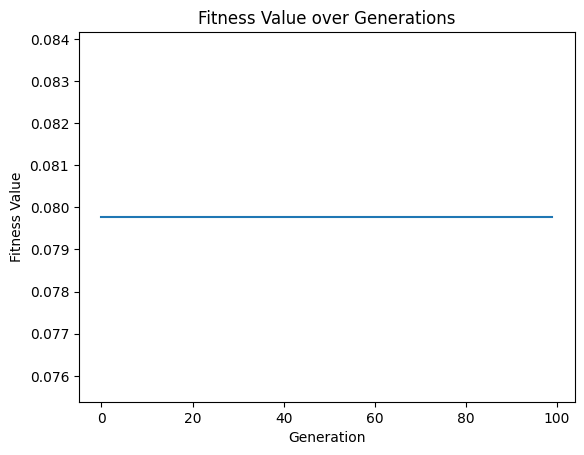

(<GA.Solution at 0x1ccbdf24340>,
 {'weighted_time_penalty': 0.0,
  'weighted_author_penalty': 0.0,
  'weighted_distribution_penalty': 0.0,
  'weighted_total_time_unused': 11.535714285714285,
  'total_penalty': 11.535714285714285,
  'fitness': 0.07977207977207978})

In [7]:
# run the genetic algorithm

pop = ga.run(papers, num_sessions, session_lengths, num_tracks_per_session, population_size)
# print out results of fittest individual in final population
pop

In [8]:
# print pop 
pop[0].print_solution()


Session 1 (Max length: 50 minutes):
  Track 1 (Total duration: 50.0 minutes):
    Paper ID: 61, Authors:  Paul Ralph,  Tushar Sharma,  Preetha Chatterjee, Duration: 50.0 minutes
----------------------------------------
Session 2 (Max length: 50 minutes):
  Track 1 (Total duration: 50.0 minutes):
    Paper ID: 142, Authors:  Natarajan Chidambaram,  Pooya Rostami Mazrae, Duration: 5.0 minutes
    Paper ID: 136, Authors: Subaihin,  Rebecca Moussa,  Federica Sarro, Duration: 4.0 minutes
    Paper ID: 65, Authors:  Cedric Richter,  Heike Wehrheim, Duration: 4.0 minutes
    Paper ID: 155, Authors:  Kristiina Rahkema,  Dietmar Pfahl, Duration: 8.0 minutes
    Paper ID: 167, Authors: , Duration: 21.0 minutes
    Paper ID: 29, Authors:  Ellen Arteca,  Alexi Turcotte, Duration: 4.0 minutes
    Paper ID: 134, Authors:  Bruno L. Sousa,  Mariza Bigonha,  Kecia A. M. Ferreira,  Glaura C. Franco, Duration: 4.0 minutes
----------------------------------------
Session 3 (Max length: 50 minutes):
  Trac